Курс Анатолия Карпова "Введение в Data Science и машинное обучение"

Блок 3. **Random forest.**

**Разминочная задачка** - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

rf = RandomForestClassifier(n_estimators=15, max_depth=5)

rf.fit(x_train, y_train)

predictions = rf.predict(x_test)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

**Задача.**
Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

In [ ]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


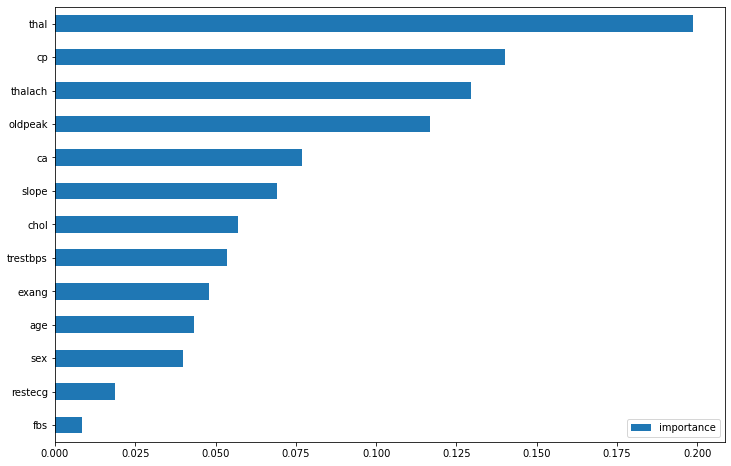

In [ ]:
X_train = heart.drop(['target'], axis = 1)
y_train = heart.target

np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importances_df.sort_values('importance').plot(kind='barh', figsize=(12, 8))

**Блок 3.5**

**Задача.** Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

Параметры для выбора -

n_estimators: от 10 до 50 с шагом 10

max_depth: от 1 до 12 с шагом 2

min_samples_leaf: от 1 до 7

min_samples_split: от 2 до 9 с шагом 2

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [ ]:
 mush = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
 mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,1,2,2,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,0,1,3,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,1,1,1,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,0,1,2,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,1,2,2,3,6,0,2,1,4,2,5,0,0


In [ ]:
X = mush.drop(['class'], axis = 1)
y = mush['class']

rf = RandomForestClassifier(random_state=0)

parametrs = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1,8), 'min_samples_split': range(2, 10, 2)}
grid_search_cv_clf = GridSearchCV(rf, parametrs, n_jobs=-1, cv=3)
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

Важность фичей

In [ ]:
feature_importances_df = grid_search_cv_clf.best_estimator_.feature_importances_
pd.DataFrame(feature_importances_df, index=X.columns, columns=['importance']).sort_values(['importance'], ascending=False)

,importance
odor,0.188376
gill-color,0.103861
stalk-root,0.103793
spore-print-color,0.083564
gill-spacing,0.080840
ring-type,0.070726
bruises,0.070109
gill-size,0.068461
stalk-surface-below-ring,0.048296
population,0.043783


**Предскажите** съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

In [ ]:
mush_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
y_pred = grid_search_cv_clf.best_estimator_.predict(mush_test)
sum(y_pred)

976

Создайте **confusion matrix** по предсказаниям, полученным вами в прошлом уроке и правильным ответам.

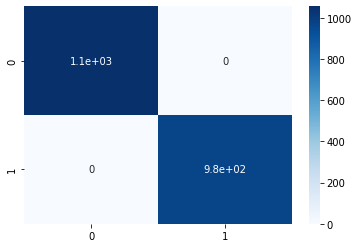

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_test = pd.read_csv('testing_y_mush.csv')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

**Задача** На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [ ]:
attack = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
attack_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
attack.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [ ]:
attack['class'] = attack['class'].apply(lambda x: 0 if x=='cruiser' else 1 if x=='transport' else 2)

X_train = attack.drop(['class'], axis=1)
y_train = attack['class']

rf = RandomForestClassifier()

parametrs = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1,8), 'min_samples_split': range(2, 10, 2)}
grid_search_cv_clf = GridSearchCV(rf, parametrs, n_jobs=-1, cv=3)
grid_search_cv_clf.fit(X_train, y_train)
best_clf = grid_search_cv_clf.best_estimator_
y_pred = best_clf.predict(attack_test)
pd.Series(y_pred).value_counts()

2    675
1    595
0    230
dtype: int64

In [ ]:
feature_importances_df = best_clf.feature_importances_
pd.DataFrame(feature_importances_df, index=X_train.columns, columns=['importance']).sort_values(['importance'], ascending=False)

,importance
volume,0.518561
i_reflection,0.167066
g_reflection,0.161721
brightness,0.123636
speed,0.029016
time_of_observance,0.000000


**Задача.** Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [ ]:
place = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
place.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [ ]:
place.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000
